In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter

from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import kci

from epc import epc

def gdata(n):
    """
    Generate data based on a causal graph with nonlinear relationships.

    Args:
        n (int): Number of samples.

    Returns:
        np.ndarray, np.ndarray: Generated data and the causal graph (trueSk).
    """
    trueSk = np.zeros((4, 4), dtype=int)
    for i in range(4):
        for j in range(i + 1, 4):
            e = int(np.random.rand() < 0.5)
            trueSk[i, j] = e
            trueSk[j, i] = e

    X1 = np.random.normal(0, 1, n)
    
    if trueSk[0,1]:
        X2 = np.random.normal(0, 1, n) + np.random.uniform(0, 1, n) * np.sin(X1)
    else:
        X2 = np.random.normal(0, 1, n)
    
    if trueSk[0,2]:
        if trueSk[1,2]:
            X3 = (np.random.normal(0, 1, n) +
                  np.random.uniform(0, 1, n) * np.log1p(np.abs(X2)) +
                  np.random.uniform(0, 1, n) * np.exp(-X1**2))
        else:
            X3 = (np.random.normal(0, 1, n) +
                  np.random.uniform(0, 1, n) * np.exp(-X1**2))
    elif trueSk[1,2]:
        X3 = np.random.normal(0, 1, n) + np.random.uniform(0, 1, n) * np.log1p(np.abs(X2))
    else:
        X3 = np.random.normal(0, 1, n)

    if trueSk[0,3]:
        if trueSk[1,3]:
            if trueSk[2,3]:
                X4 = (np.random.normal(0, 1, n) +
                      np.random.uniform(0, 1, n) * np.sqrt(np.abs(X3)) +
                      np.random.uniform(0, 1, n) * np.sin(X2) +
                      np.random.uniform(0, 1, n) * np.cos(X1))
            else:
                X4 = (np.random.normal(0, 1, n) +
                      np.random.uniform(0, 1, n) * np.sin(X2) +
                      np.random.uniform(0, 1, n) * np.cos(X1))
        elif trueSk[2,3]:
            X4 = (np.random.normal(0, 1, n) +
                  np.random.uniform(0, 1, n) * np.sqrt(np.abs(X3)) +
                  np.random.uniform(0, 1, n) * np.cos(X1))
        else:
            X4 = (np.random.normal(0, 1, n) +
                  np.random.uniform(0, 1, n) * np.cos(X1))
    elif trueSk[1,3]:
        if trueSk[2,3]:
            X4 = (np.random.normal(0, 1, n) +
                  np.random.uniform(0, 1, n) * np.sqrt(np.abs(X3)) +
                  np.random.uniform(0, 1, n) * np.sin(X2))
        else:
            X4 = np.random.normal(0, 1, n) + np.random.uniform(0, 1, n) * np.sin(X2)
    elif trueSk[2,3]:
        X4 = np.random.normal(0, 1, n) + np.random.uniform(0, 1, n) * np.sqrt(np.abs(X3))
    else:
        X4 = np.random.normal(0, 1, n)

    data = np.array([X1, X2, X3, X4]).T
    
    return data, trueSk

In [ ]:
t = 100
n = 800
res = []

for i in tqdm(range(t), desc="Processing"):
    np.random.seed(i)
    data, trueSk = gdata(n)
    cg = pc(data, 0.1, kci, show_progress=False)
    sk = np.abs(cg.G.graph)
    if np.all(np.abs(sk) == trueSk):
        res.append(1)
    else:
        res.append(0)
np.sum(res)/t #正确率

Processing: 100%|██████████| 100/100 [05:21<00:00,  3.21s/it]


0.63

In [ ]:
t = 100
n = 1600
eres = []

for i in tqdm(range(t), desc="Processing"):
    np.random.seed(i)
    data, trueSk = gdata(n)
    ecg = epc(data, 0.4, "Gamma", 8, show_progress=False)
    esk =np.abs(ecg.G.graph)
    if np.all(np.abs(esk) == trueSk):
        eres.append(1)
    else:
        eres.append(0)
np.sum(eres)/t #正确率

Processing: 100%|██████████| 100/100 [02:34<00:00,  1.54s/it]


0.54

In [13]:
t = 50
n = 1600
eres = []

for i in tqdm(range(t), desc="Processing"):
    np.random.seed(i)
    data, trueSk = gdata(n)
    ecg = epc(data, 0.1, "ACAT", 4, show_progress=False)
    esk =np.abs(ecg.G.graph)
    if np.all(np.abs(esk) == trueSk):
        eres.append(1)
    else:
        eres.append(0)
np.sum(eres)/t #42

Processing: 100%|██████████| 50/50 [04:03<00:00,  4.87s/it]


0.66

---

In [ ]:
t = 100
errs = []
for n in [200,400,800,1200,1600,2000,2400]:
    err = 0
    for i in tqdm(range(t), desc="Processing"):
        np.random.seed(i)
        data, trueSk = gdata(n)
        cg = pc(data, 0.1, kci, show_progress=False)
        sk = np.abs(cg.G.graph)
        if not np.all(np.abs(sk) == trueSk):
            err += 1
    errs.append(err/t)
errs

Processing: 100%|██████████| 100/100 [1:35:20<00:00, 57.20s/it]  


[0.89, 0.72, 0.37, 0.35, 0.3, 0.15, 0.18]

In [ ]:
t = 100
errs_e = []
for n in [200,400,800,1200,1600,2000,2400]:
    err_e = 0
    for i in tqdm(range(t), desc="Processing"):
        np.random.seed(i)
        data, trueSk = gdata(n)
        ecg = epc(data, 0.4, "Gamma", 8, show_progress=False)
        esk =np.abs(ecg.G.graph)
        if not np.all(np.abs(esk) == trueSk):
            err_e += 1
    errs_e.append(err_e/t)
errs_e

Processing: 100%|██████████| 100/100 [15:35<00:00,  9.36s/it]


[0.9, 0.75, 0.52, 0.33, 0.34, 0.25, 0.17]

In [39]:
t = 100
errs_e = []
for n in [200,400,800,1200,1600,2000,2400]:
    err_e = 0
    for i in tqdm(range(t), desc="Processing"):
        np.random.seed(i)
        data, trueSk = gdata(n)
        ecg = epc(data, 0.4, "Gamma", int(n/200), show_progress=False)
        esk =np.abs(ecg.G.graph)
        if not np.all(np.abs(esk) == trueSk):
            err_e += 1
    errs_e.append(err_e/t)
errs_e

Processing: 100%|██████████| 100/100 [11:15<00:00,  6.76s/it]


[0.82, 0.68, 0.46, 0.49, 0.34, 0.28, 0.19]

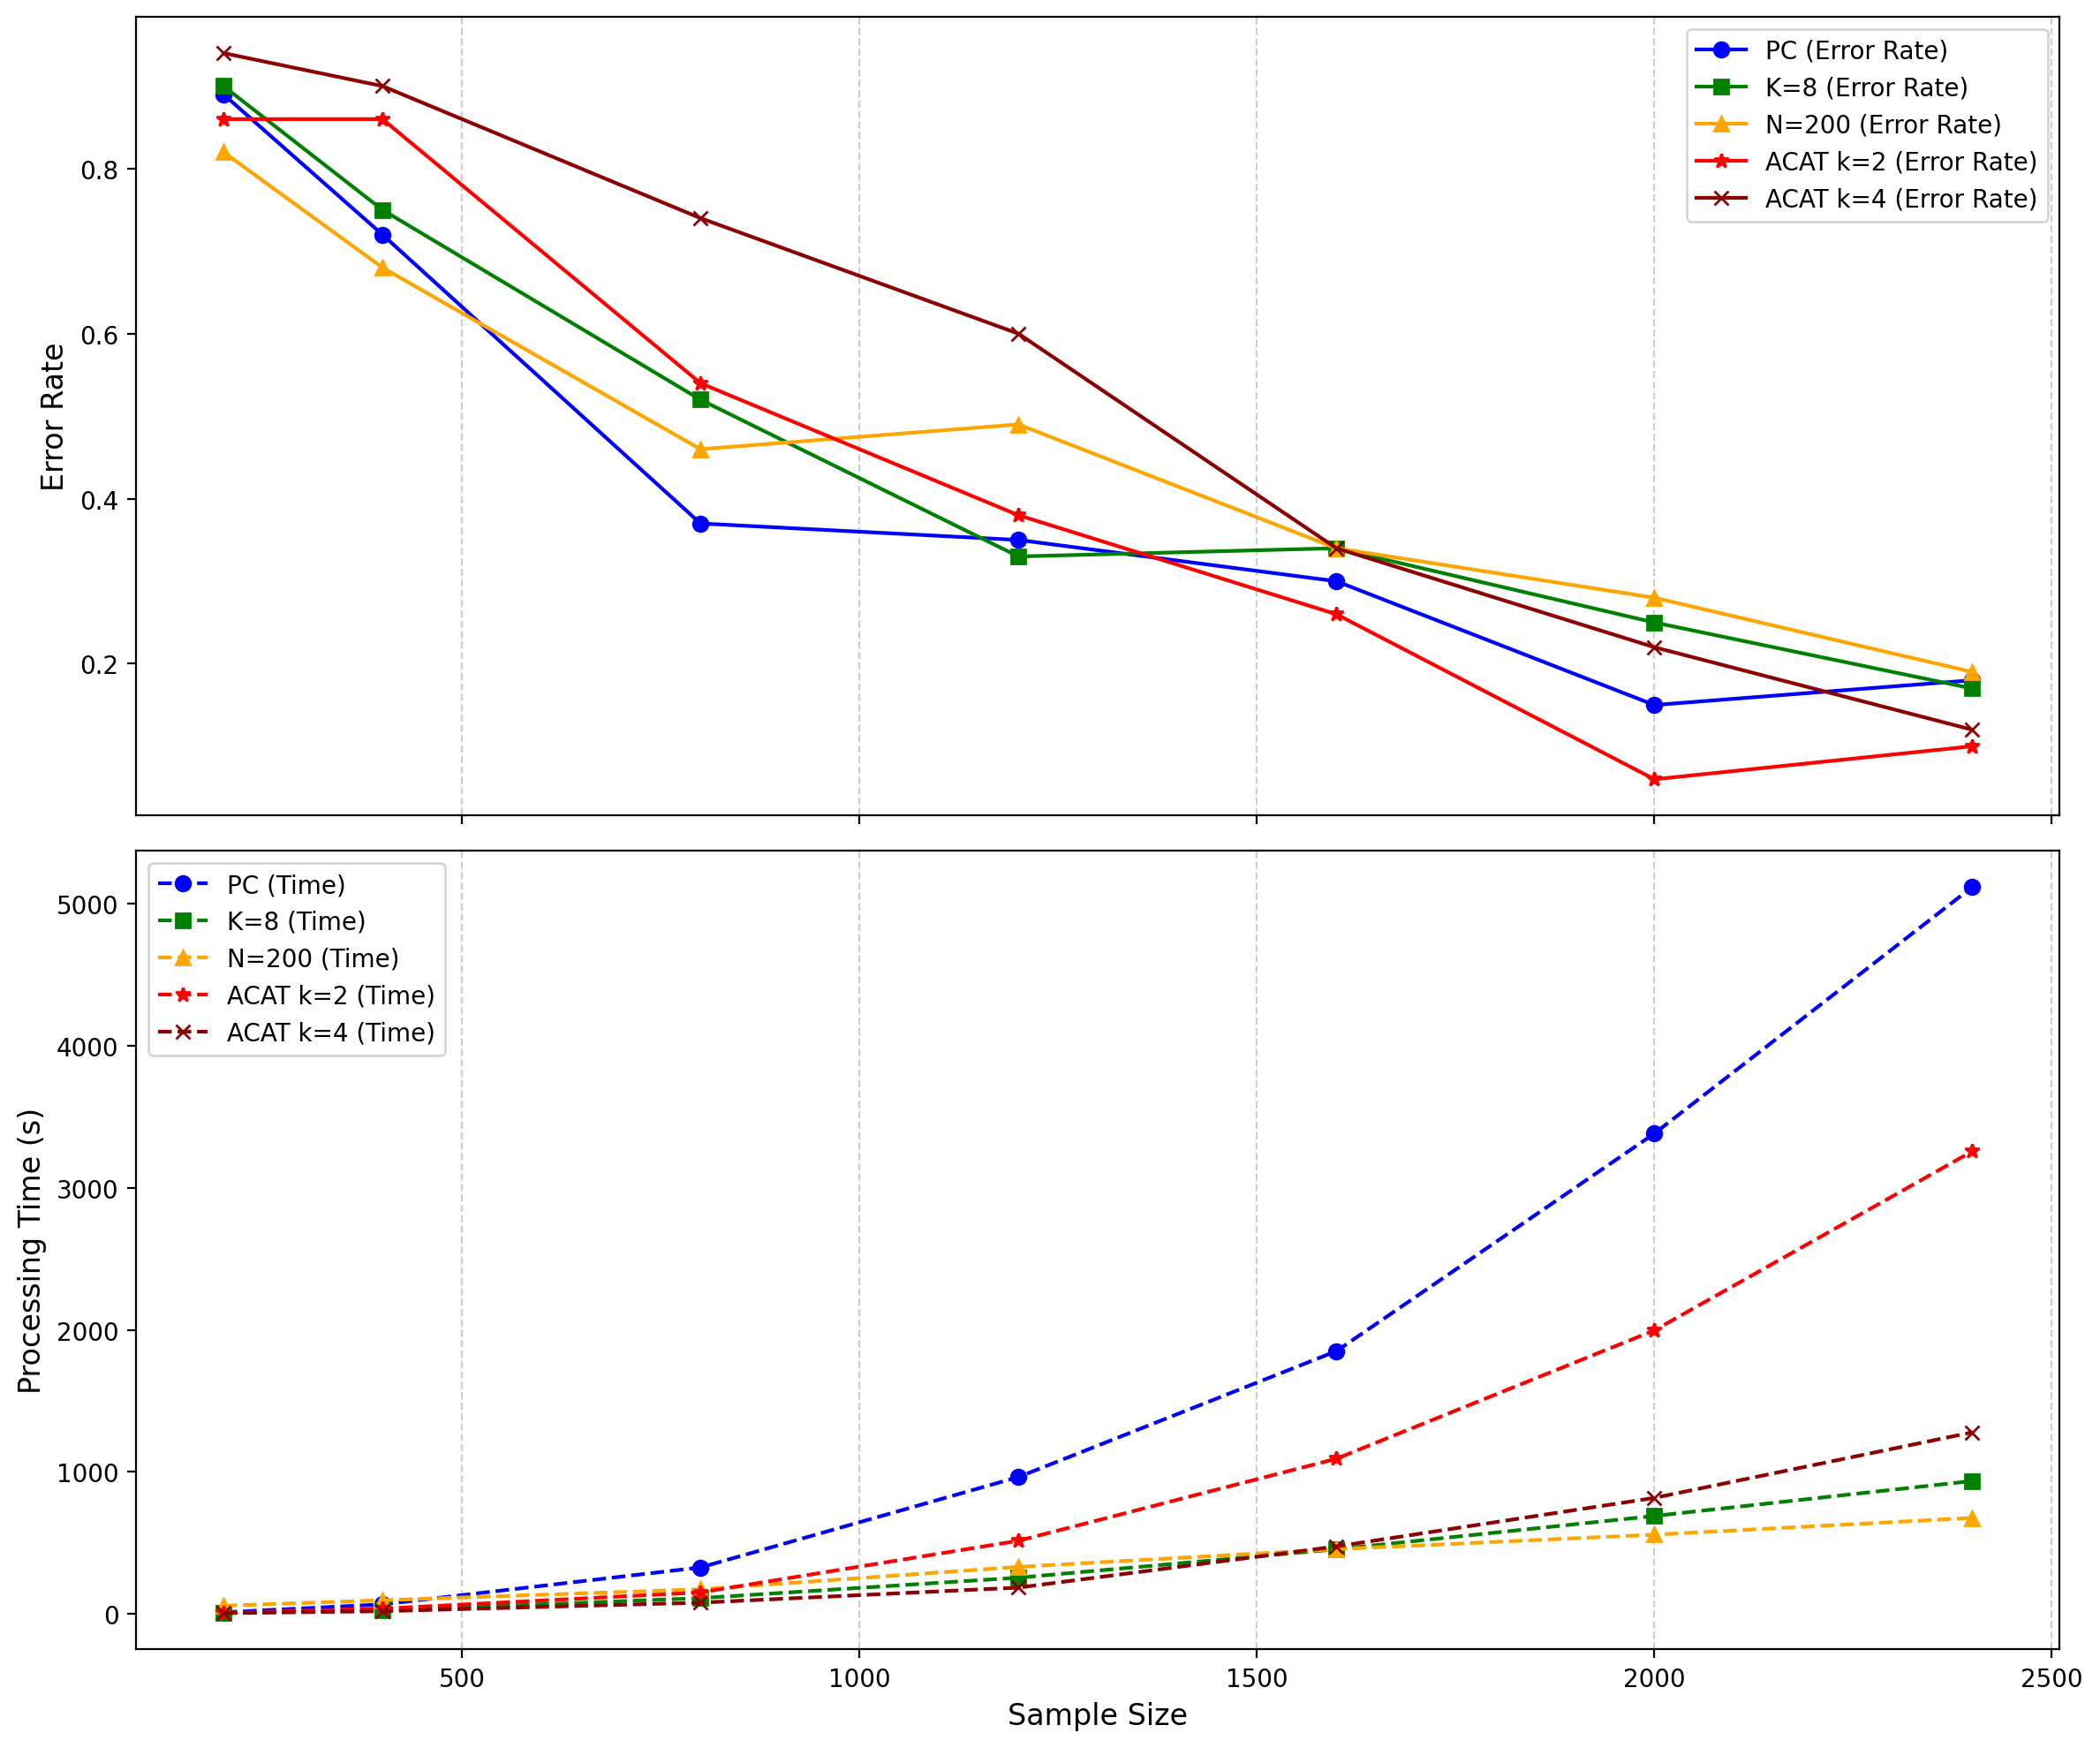

In [9]:
import matplotlib.pyplot as plt

# 数据定义
x = [200,400,800,1200,1600,2000,2400]  # x轴：样本大小
# 方法对应的时间数据（单位：秒）
time_pc = [10,66,326,963,1850,3383,5120]
time_k8 = [6,23,110,254,454,689,935]
time_n200 = [56,95,172,330,455,557,675]
time_acat2 = [6,36,150,514,1092,1996,3258]
time_acat4 = [4,18,78,184,474,816,1278]
# 方法对应的结果数据
pc = [0.89, 0.72, 0.37, 0.35, 0.3, 0.15, 0.18]
k_8 = [0.9, 0.75, 0.52, 0.33, 0.34, 0.25, 0.17]
n_200 = [0.82, 0.68, 0.46, 0.49, 0.34, 0.28, 0.19]
acat2 = [0.86, 0.86, 0.54, 0.38, 0.26, 0.06, 0.1]
acat4 = [0.94, 0.9, 0.74, 0.6, 0.34, 0.22, 0.12]
# 创建一个包含上下两个子图的布局
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True, dpi=200)

# 子图1：性能指标
ax1.plot(x, pc, marker='o', label='PC (Error Rate)', color='blue')
ax1.plot(x, k_8, marker='s', label='K=8 (Error Rate)', color='green')
ax1.plot(x, n_200, marker='^', label='N=200 (Error Rate)', color='orange')
ax1.plot(x, acat2, marker='*', label='ACAT k=2 (Error Rate)', color='red')
ax1.plot(x, acat4, marker='x', label='ACAT k=4 (Error Rate)', color='darkred')
ax1.set_ylabel('Error Rate', fontsize=12)
ax1.legend(fontsize=10, loc='upper right')
ax1.grid(axis='x', linestyle='--', alpha=0.6)

# 子图2：处理时间
ax2.plot(x, time_pc, marker='o', label='PC (Time)', color='blue', linestyle='--')
ax2.plot(x, time_k8, marker='s', label='K=8 (Time)', color='green', linestyle='--')
ax2.plot(x, time_n200, marker='^', label='N=200 (Time)', color='orange', linestyle='--')
ax2.plot(x, time_acat2, marker='*', label='ACAT k=2 (Time)', color='red', linestyle='--')
ax2.plot(x, time_acat4, marker='x', label='ACAT k=4 (Time)', color='darkred', linestyle='--')
ax2.set_xlabel('Sample Size', fontsize=12)
ax2.set_ylabel('Processing Time (s)', fontsize=12)
ax2.legend(fontsize=10, loc='upper left')
ax2.grid(axis='x', linestyle='--', alpha=0.6)

# 调整布局
plt.tight_layout()
plt.show()

In [ ]:
t = 50
errs_e = []
for n in [200,400,800,1200,1600,2000,2400]:
    err_e = 0
    for i in tqdm(range(t), desc="Processing"):
        np.random.seed(i)
        data, trueSk = gdata(n)
        ecg = epc(data, 0.1, "ACAT", 2, show_progress=False)
        esk =np.abs(ecg.G.graph)
        if not np.all(np.abs(esk) == trueSk):
            err_e += 1
    errs_e.append(err_e/t)
    print(errs_e[-1])
errs_e

Processing: 100%|██████████| 50/50 [00:03<00:00, 13.66it/s]


0.86


Processing: 100%|██████████| 50/50 [00:18<00:00,  2.73it/s]


0.86


Processing: 100%|██████████| 50/50 [01:15<00:00,  1.52s/it]


0.54


Processing: 100%|██████████| 50/50 [04:17<00:00,  5.14s/it]


0.38


Processing: 100%|██████████| 50/50 [09:06<00:00, 10.93s/it]


0.26


Processing: 100%|██████████| 50/50 [16:38<00:00, 19.98s/it]


0.06


Processing: 100%|██████████| 50/50 [27:09<00:00, 32.58s/it]   

0.1


[0.86, 0.86, 0.54, 0.38, 0.26, 0.06, 0.1]

In [ ]:
t = 50
errs_e = []
for n in [200,400,800,1200,1600,2000,2400]:
    err_e = 0
    for i in tqdm(range(t), desc="Processing"):
        np.random.seed(i)
        data, trueSk = gdata(n)
        ecg = epc(data, 0.1, "ACAT", 4, show_progress=False)
        esk =np.abs(ecg.G.graph)
        if not np.all(np.abs(esk) == trueSk):
            err_e += 1
    errs_e.append(err_e/t)
    print(errs_e[-1])
errs_e

Processing: 100%|██████████| 50/50 [00:02<00:00, 23.14it/s]


0.94


Processing: 100%|██████████| 50/50 [00:09<00:00,  5.56it/s]


0.9


Processing: 100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


0.74


Processing: 100%|██████████| 50/50 [01:32<00:00,  1.86s/it]


0.6


Processing: 100%|██████████| 50/50 [03:57<00:00,  4.75s/it]


0.34


Processing: 100%|██████████| 50/50 [06:48<00:00,  8.18s/it]


0.22


Processing: 100%|██████████| 50/50 [10:39<00:00, 12.79s/it]

0.12


[0.94, 0.9, 0.74, 0.6, 0.34, 0.22, 0.12]